# Scalable Data Analysis

*August 9, 2019, Valentina Staneva*

---
### Goals of this tutorial:

* Discuss general strategies for making programs work well with big data sets.
* Learn to distinguish between some large scale computing jargon
* Overview several parallelization packages in Python
* Dive into the [Dask](http://dask.pydata.org/en/latest/) library

---
### Motivation


What is this tutorial about? Researchers across domains get overloaded with large datasets which their traditional processing workflows are incapable to handle.


* Ran out of memory!!!
* Code takes forever to run!!!


* And the dataset I am using is not even the biggest one I have….
* And I need to run it on xxx more time….

*What should I do???*

Some questions to answer:
* How many times I need to run this code?
* Can I read the data? Do I run out of RAM during the processing of the data?
* What computational resources do I have available?

Usually they are faced with two possible options: 
* move the processing to large machines/clusters
* modify their methods to access the data only pieces at a time.

Ideally, we want to make minimal changes to our code and be able to test out things on their laptops, and later move to clusters, without having to modify their code a lot.

A few other options:
* use cython
    * writing C code in Python friendly extensions
* use numba
    * compiling the code: it might work out of the box, it might not
* use GPUs 
    * great for problems which require many parallel small operations, such as in image processing, deep learning, graphics

---
### Therminology
* threads, processes, cores, workers, clusters
* shared memory, distributed memory, external memory
* memory map, out of core

### Python Parallelization Packages
* [Multiprocessing](https://docs.python.org/2/library/multiprocessing.html): multithreading in Python
* [Concurrent.Futures](https://docs.python.org/3/library/concurrent.futures.html): multiprocessing and multithreading interface unified
* [Joblib](https://joblib.readthedocs.io/en/latest/parallel.html): embarassingly parallel loops
* [ipyparallel](https://ipyparallel.readthedocs.io/en/latest/): works both locally and on a cluster
* [dask](https://dask.org/): apart from parallelization, supports out of core and cluster manipulations of large datasets (images, tables)
* [PySpark](https://spark.apache.org/docs/latest/api/python/index.html): supports table, graph processing (locally and on cluster)

In [ ]:
Some examples:

In [18]:
from concurrent.futures import ProcessPoolExecutor
from math import sqrt

number_list = range(10)

pool = ProcessPoolExecutor()
for result in pool.map(sqrt,number_list):
    print(result)

0.0
1.0
1.4142135623730951
1.7320508075688772
2.0
2.23606797749979
2.449489742783178
2.6457513110645907
2.8284271247461903
3.0


Process Process-14:
Process Process-13:
Traceback (most recent call last):
  File "/home/nbuser/anaconda3_420/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/nbuser/anaconda3_420/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/nbuser/anaconda3_420/lib/python3.5/concurrent/futures/process.py", line 169, in _process_worker
    call_item = call_queue.get(block=True)
  File "/home/nbuser/anaconda3_420/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/nbuser/anaconda3_420/lib/python3.5/multiprocessing/queues.py", line 93, in get
    with self._rlock:
  File "/home/nbuser/anaconda3_420/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/nbuser/anaconda3_420/lib/python3.5/concurrent/futures/process.py", line 169, in _process_worke

In [21]:
!conda install --yes joblib

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /home/nbuser/anaconda3_420:

The following NEW packages will be INSTALLED:

    _libgcc_mutex: 0.1-main        
    joblib:        0.12.3-py35_0   
    readline:      7.0-ha6073c6_4  

The following packages will be UPDATED:

    conda:         4.3.31-py35_0    --> 4.5.11-py35_0       
    conda-env:     2.6.0-h36134e3_1 --> 2.6.0-1             
    pycosat:       0.6.1-py35_1     --> 0.6.3-py35h6b6bb97_0

_libgcc_mutex- 100% |################################| Time: 0:00:00   1.97 MB/s
conda-env-2.6. 100% |################################| Time: 0:00:00   3.92 MB/s
readline-7.0-h 100% |################################| Time: 0:00:00  29.92 MB/s
joblib-0.12.3- 100% |################################| Time: 0:00:00   7.30 MB/s
pycosat-0.6.3- 100% |################################| Time: 0:00:00  31.45 MB/s
conda-4.5.11-p 100% |################################| Time: 0:00

In [ ]:
from joblib import Parallel, delayed
from math import sqrt

number_list = range(10)

Parallel(n_jobs=1)(delayed(sqrt)(i) for i in number_list)

In [29]:
!conda install --yes ipyparallel

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/nbuser/anaconda3_420

  added / updated specs: 
    - ipyparallel


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ipyparallel-6.2.2          |           py35_0         307 KB

The following NEW packages will be INSTALLED:

    ipyparallel: 6.2.2-py35_0


ipyparallel-6.2.2    | 307 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [40]:
# start from terminal
!ipcluster start -n 2

nohup: ignoring input and appending output to 'nohup.out'
^C


In [ ]:
!ipcluster start -n 2
from ipyparallel import Client
client = Client()

from math import sqrt

number_list = range(10)

parallel_result = client.map_sync(lambda x: sqrt(x), number_list)
!ipcluster stop

2019-08-09 18:05:48.393 [IPClusterStart] Removing pid file: /home/nbuser/.ipython/profile_default/pid/ipcluster.pid
2019-08-09 18:05:48.393 [IPClusterStart] Starting ipcluster with [daemon=False]
2019-08-09 18:05:48.394 [IPClusterStart] Creating pid file: /home/nbuser/.ipython/profile_default/pid/ipcluster.pid
2019-08-09 18:05:48.394 [IPClusterStart] Starting Controller with LocalControllerLauncher
2019-08-09 18:05:49.403 [IPClusterStart] Starting 2 Engines with LocalEngineSetLauncher
2019-08-09 18:06:19.555 [IPClusterStart] Engines appear to have started successfully
^C2019-08-09 18:17:38.210 [IPClusterStart] ERROR | IPython cluster: stopping
2019-08-09 18:17:38.210 [IPClusterStart] Stopping Engines...

Waiting for connection file: ~/.ipython/profile_default/security/ipcontroller-client.json


### Dask Library

[Dask](http://dask.pydata.org/en/latest/) is a Python Library which makes this possible: 
* can perform computations on images which cannot fit into RAM
* has interface similar to `numpy` and `scipy`
* the same code used on your laptop can be run on a distributed cluster


The Dask library provides several useful objects
* [Dask Arrays](http://dask.pydata.org/en/latest/array.html) (for numpy-like operations) *
* [Dask DataFrames](http://dask.pydata.org/en/doc-test-build/dataframe.html) (for pandas-like operations)
* [Dask Bags](http://dask.pydata.org/en/latest/bag.html) (for unstructured-data-like operations, such as text)
* [Dask Delayed](http://dask.pydata.org/en/latest/delayed.html) (for general functions and operations) *

We will be working with a [dataset of leaf images](https://archive.ics.uci.edu/ml/datasets/leaf) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/).The description is in
*'Evaluation of Features for Leaf Discrimination', Pedro F.B. Silva, Andre R.S. Marcal, Rubim M. Almeida da Silva (2013). Springer Lecture Notes in Computer Science, Vol. 7950, 197-204.*

#### Objectives:
* learn how to execute basic operations on arrays which cannot fit in RAM
* learn about the concepts of lazy evaluation and task scheduling graphs
* learn how to work with [Dask Arrays](http://dask.pydata.org/en/latest/array.html)
* learn how to work with [Dask Delayed](http://dask.pydata.org/en/latest/delayed.html)

In [4]:
import os
path = os.path.join('data','leaf','RGB')

In [5]:
# some preliminary imports
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Dask Arrays

Dask arrays are similar to numpy arrays, except that they are chunked into small pieces.

In [6]:
# check version of dask
# import dask
# dask.__version__
# !conda install --yes dask

In [7]:
import dask.array as da
from dask.array.image import imread

We can read a collection of images into a dask array.

In [8]:
leaf_images = imread(os.path.join(path,'*','*.JPG'))
leaf_images = leaf_images[:,::4,::4,:]

Let's look at it:

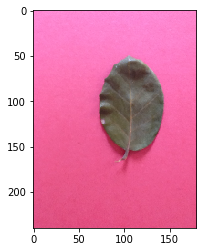

In [9]:
plt.imshow(leaf_images[0,:,:,:])

In [10]:
# saving the dimensions
T, m, n, d = leaf_images.shape

Each image is a separate chunk.

*The images are not loaded into RAM!!!!*

We can do computations on the dask array as long as individual chunks (and the computations on them) fit into RAM.

Let's  find the mean image:

In [11]:
%%time
leaf_images.mean(axis=0)

CPU times: user 14.1 ms, sys: 677 µs, total: 14.8 ms
Wall time: 14.2 ms


dask.array<mean_ag..., shape=(240, 180, 3), dtype=float64, chunksize=(240, 180, 3)>

The above statement creates another dask array, which is not loaded into RAM, i.e. it is not calculated yet. 
It waits for us tell dask explicitly when to do the calculation using the `compute` command.This is called [lazy evaluation](https://en.wikipedia.org/wiki/Lazy_evaluation).

In [12]:
%%time
mean_leaf_image = leaf_images[:,:,:,0].mean(axis=0).compute()

CPU times: user 1.99 s, sys: 395 ms, total: 2.39 s
Wall time: 1min 10s


In [13]:
mean_leaf_image.shape

(240, 180)

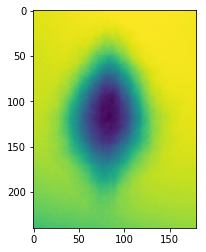

In [14]:
plt.imshow(mean_leaf_image)

***Important: only the final image is stored in RAM, which is smaller than the original collection!***

Note: if we pass a dask array to a function not supporting dask arrays, it often gets converted to an in-memory numpy array and evaluated.

A lot of other functions to perform on images using the [Dask API](http://dask.pydata.org/en/latest/array-api.html).

#### Exercise: visualizing graphs

You can visualize the individual steps of your computation as a graph. For example, this is the graph for computing a mean of an array consisting of 4 chunks:

<center>*Mean of a 2D Array*</center>
<img src="dask_graph.png" width="300" height="200" >

For that you need to install an additional package.

```
conda install graphviz

```
Then you can import `graphviz` in Python and for any dask array run

```
dask_array_name.visualize()
```

Try visualizing the graph for mean of all images. If the visualization does not look good in the notebook you can save it as a `.svg` file and look at the image via your browser:

```
dask_array_name.visualize('graph.svg')
```

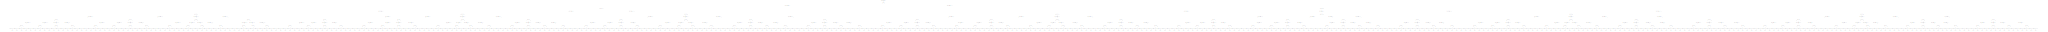

In [15]:
leaf_images[:,:,:,0].mean(axis=0).visualize('graph.svg',optimize_graph= True)

#### Monitoring Performance

In [ ]:
from dask.diagnostics import ProgressBar

In [ ]:
# Single machine progress bar
res = leaf_images.mean(axis=0)
with ProgressBar():
    out = res.compute()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!conda install --yes bokeh=0.12.9

In [16]:
import bokeh
bokeh.__version__

'0.12.9'

In [17]:
from bokeh.plotting import output_notebook
output_notebook()

Loading BokehJS ...

In [18]:
# cpu, ram performance
from dask.diagnostics import Profiler, ResourceProfiler
rprof = ResourceProfiler(dt=0.5)

res = leaf_images[:,:,:,0].mean(axis=0)
with Profiler() as prof, ResourceProfiler(dt=0.25) as rprof:
    # wrapping the computation step with the Profiler
    out = res.compute()
    
from dask.diagnostics import visualize
visualize([prof, rprof])

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: ResizeTool is removed in Bokeh 0.12.7, adding it is a no-op. In the future, accessing ResizeTool will be an error
  warn(message)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: ResizeTool is removed in Bokeh 0.12.7, adding it is a no-op. In the future, accessing ResizeTool will be an error
  warn(message)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/bokeh/core/validation/check.py - WARNING - W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure(id='5f0aceea-aad6-4c9c-a22e-c77ff56aae79', ...)


Column(id='aeab7d78-c7b7-4067-871a-ce8aa3cbf39c', ...)

In [ ]:
!conda install --yes bokeh

In [ ]:
from imp import reload
reload(bokeh)

In [ ]:
bokeh

In [ ]:
# seems bokeh 0.13.0 is incompatible with visualize (does not have an internal variable _state, so installing the previous version)

In [19]:
leaf_images


dask.array<getitem..., shape=(442, 240, 180, 3), dtype=uint8, chunksize=(1, 240, 180, 3)>

#### Exercise: simple calculations

In [ ]:
# mean across the first channel for each image

In [ ]:
# mean for each RGB color for each image

#### Distributed Computing - beyond a single machine

[Dask Schedulers](http://dask.pydata.org/en/latest/scheduler-overview.html)

![](http://dask.pydata.org/en/latest/_images/collections-schedulers.png)

The default scheduler for dask arrays is threaded. It can be used only on a single machine. We can change to a distributed schedule by starting a client:

In [ ]:
# if you don't have dask distributed installed you can obtain it by uncommenting the line below:

#!conda install --yes tornado=4.5.3
!conda update --yes dask distributed


In [48]:
# Distributed scheduler 

from dask.distributed import Client

client = Client()  # use dask.distributed by default
print(client)

<Client: scheduler="127.0.0.1:37505" processes=2 cores=2>


Process Process-11:
Traceback (most recent call last):
  File "/home/nbuser/anaconda3_420/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/nbuser/anaconda3_420/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Process Process-10:
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/nanny.py", line 357, in run_worker_fork
    loop.start()  # pragma: no cover
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 122, in poll
    z_events = self._poller.poll(1000*timeout)
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/tornado/ioloop.py", line 862, in start
    event_pairs = self._impl.poll(poll_timeout)
Traceback (most recent call last):
  File "/home/nbuser/anaconda3_420

From now on any `compute` command will use the distributed scheduler.

In [25]:
leaf_images.mean(axis = 0)

dask.array<mean_ag..., shape=(240, 180, 3), dtype=float64, chunksize=(240, 180, 3)>

In [22]:
mean_leaf_image = leaf_images.mean(axis = 0).compute()

In [ ]:
!conda update --yes dask

In [23]:
# Distributed Progress Bar
from dask.distributed import progress
out = leaf_images.mean(axis = 0).compute()
progress(out)
# this requires the ipython widgets enabled, do it by:
# jupyter nbextension enable --py --sys-prefix widgetsnbextension

VBox()

**Blocking and Persisting**

The compute operation is blocking, i.e we have to wait for it to finish to compute the next step. When the task graph is large and it involves some expensive operations such as reading from disk multiple times, this becomes inefficient. In that case it is better to keep the data object in distributed RAM and this can be achieved using the `persist` function. Persist starts the computation immediately (i.e. it is not lazy). 

In [28]:
leaf_images_persisted = client.persist(leaf_images)  # start computation in the background
leaf_images_persisted.dask     # watch progress

{('getitem-5dbf267747848b8d406b5e5954374217',
  0,
  0,
  0,
  0): <Future: status: pending, key: ('getitem-5dbf267747848b8d406b5e5954374217', 0, 0, 0, 0)>,
 ('getitem-5dbf267747848b8d406b5e5954374217',
  1,
  0,
  0,
  0): <Future: status: pending, key: ('getitem-5dbf267747848b8d406b5e5954374217', 1, 0, 0, 0)>,
 ('getitem-5dbf267747848b8d406b5e5954374217',
  2,
  0,
  0,
  0): <Future: status: pending, key: ('getitem-5dbf267747848b8d406b5e5954374217', 2, 0, 0, 0)>,
 ('getitem-5dbf267747848b8d406b5e5954374217',
  3,
  0,
  0,
  0): <Future: status: pending, key: ('getitem-5dbf267747848b8d406b5e5954374217', 3, 0, 0, 0)>,
 ('getitem-5dbf267747848b8d406b5e5954374217',
  4,
  0,
  0,
  0): <Future: status: pending, key: ('getitem-5dbf267747848b8d406b5e5954374217', 4, 0, 0, 0)>,
 ('getitem-5dbf267747848b8d406b5e5954374217',
  5,
  0,
  0,
  0): <Future: status: pending, key: ('getitem-5dbf267747848b8d406b5e5954374217', 5, 0, 0, 0)>,
 ('getitem-5dbf267747848b8d406b5e5954374217',
  6,
  0,
  

In [ ]:
# shut down the client
client.shutdown()

In [38]:
# we can return to the threaded scheduler at any time
import dask
dask.set_options(scheduler='threads')

In [ ]:
from dask import distributed

In [ ]:
!conda update --yes dask

In [ ]:
!pip freeze

In [ ]:
import dask

Key Points:

* dask arrays are not loaded into memory until you start doing computations on them
* computations on dask arrays are not executed until you ask for them via `.compute`()
* passing a `dask.array` to a `numpy` or `matplotlib` function might work but the computation will be done in memory
* sometimes it is helpful to load data into memory: for that use persist with the distributed scheduler

---
### Perform Principal Component Analysis on a Collection of Images

PCA can be perform by the following steps:
* center the images
* reshape the data into a matrix # features x # observations format
* perform SVD on the data matrix D = USV^T
* flip the signs to make the output deterministic
* reshape the columsn of U into an image format -> these are the principal directions

In [40]:
# center the images
leaf_images_centered = leaf_images - leaf_images.mean(axis = 0)

In [41]:
# create a data matrix - # observations x # features
data = leaf_images[:,:,:,0].reshape((-1,m*n))

print(data.shape)
data

(442, 43200)


dask.array<reshape..., shape=(442, 43200), dtype=uint8, chunksize=(1, 43200)>

The singular value decomposition uses QR decomposition under the hood, in particular dask uses the Tall-And-Skinny QR algorithm.

In [42]:
help(da.linalg.tsqr)

Help on function tsqr in module dask.array.linalg:

tsqr(data, name=None, compute_svd=False)
    Direct Tall-and-Skinny QR algorithm
    
    As presented in:
    
        A. Benson, D. Gleich, and J. Demmel.
        Direct QR factorizations for tall-and-skinny matrices in
        MapReduce architectures.
        IEEE International Conference on Big Data, 2013.
        http://arxiv.org/abs/1301.1071
    
    This algorithm is used to compute both the QR decomposition and the
    Singular Value Decomposition.  It requires that the input array have a
    single column of blocks, each of which fit in memory.
    
    If blocks are of size ``(n, k)`` then this algorithm has memory use that
    scales as ``n**2 * k * nthreads``.
    
    Parameters
    ----------
    
    data: Array
    compute_svd: bool
        Whether to compute the SVD rather than the QR decomposition
    
    See Also
    --------
    
    dask.array.linalg.qr - Powered by this algorithm
    dask.array.linalg.svd - Pow

Our data matrix is short-and-fat, so we will apply the svd to the transpose.

In [43]:
data.shape

(442, 43200)

* single column of blocks

|   |
|------|
|   |
|   |
|   |
|   | 
|   |
|   |
|   |

In [44]:
data = data.rechunk((T,260))
data.T

dask.array<transpo..., shape=(43200, 442), dtype=uint8, chunksize=(260, 442)>

In [45]:
u, s, vt = da.linalg.svd(data.T)

We have learned that to obtain the values of a dask array we need to run 

```
    u.compute()
```

However, if we do it for each u,s,vt it will be inefficient since we will have to compute the svd 3 times. When there are multiple outputs we can use dask's `compute` function to do the computation simultenously.

In [46]:
from dask import compute

In [49]:
%%time
u, s, vt = compute(u[:,:10],s[:10],vt[:,:10])

CPU times: user 17.1 s, sys: 4.23 s, total: 21.3 s
Wall time: 2min 35s


In [37]:
# run with the profiler
with Profiler() as prof, ResourceProfiler(dt=0.25) as rprof,CacheProfiler() as cprof:
    u, s, vt = da.linalg.svd(data.T)
    u, s, vt = compute(u[:,:10],s[:10],vt[:,:10])

visualize([prof, rprof, cprof])

Exception ignored in: <bound method Future.__del__ of <Future: status: cancelled, key: ('getitem-c39d6fed17d246c66cf6261fed2ea28b', 17, 0)>>
Traceback (most recent call last):
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 222, in __del__
    self.release()
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 210, in release
    self.client._dec_ref(tokey(self.key))
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 441, in _dec_ref
    self._release_key(key)
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 452, in _release_key
    'client': self.id})
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 349, in _send_to_scheduler
    raise Exception("Client not running.  Status: %s" % self.status)
Exception: Client not running.  Status: None
Exception ignored in: <bound method Futur

    self.client._dec_ref(tokey(self.key))
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 441, in _dec_ref
    self._release_key(key)
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 452, in _release_key
    'client': self.id})
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 349, in _send_to_scheduler
    raise Exception("Client not running.  Status: %s" % self.status)
Exception: Client not running.  Status: None
Exception ignored in: <bound method Future.__del__ of <Future: status: cancelled, key: ('getitem-c39d6fed17d246c66cf6261fed2ea28b', 130, 0)>>
Traceback (most recent call last):
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 222, in __del__
    self.release()
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 210, in release
    self.client._dec_ref(tokey(self.key)

    self.client._dec_ref(tokey(self.key))
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 441, in _dec_ref
    self._release_key(key)
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 452, in _release_key
    'client': self.id})
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 349, in _send_to_scheduler
    raise Exception("Client not running.  Status: %s" % self.status)
Exception: Client not running.  Status: None
Exception ignored in: <bound method Future.__del__ of <Future: status: cancelled, key: ('getitem-c39d6fed17d246c66cf6261fed2ea28b', 160, 0)>>
Traceback (most recent call last):
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 222, in __del__
    self.release()
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 210, in release
    self.client._dec_ref(tokey(self.key)

    self._release_key(key)
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 452, in _release_key
    'client': self.id})
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 349, in _send_to_scheduler
    raise Exception("Client not running.  Status: %s" % self.status)
Exception: Client not running.  Status: None
Exception ignored in: <bound method Future.__del__ of <Future: status: cancelled, key: ('getitem-c39d6fed17d246c66cf6261fed2ea28b', 142, 0)>>
Traceback (most recent call last):
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 222, in __del__
    self.release()
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 210, in release
    self.client._dec_ref(tokey(self.key))
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 441, in _dec_ref
    self._release_key(key)
  File "/home

    self._release_key(key)
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 452, in _release_key
    'client': self.id})
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 349, in _send_to_scheduler
    raise Exception("Client not running.  Status: %s" % self.status)
Exception: Client not running.  Status: None
Exception ignored in: <bound method Future.__del__ of <Future: status: cancelled, key: ('getitem-c39d6fed17d246c66cf6261fed2ea28b', 119, 0)>>
Traceback (most recent call last):
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 222, in __del__
    self.release()
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 210, in release
    self.client._dec_ref(tokey(self.key))
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/distributed/client.py", line 441, in _dec_ref
    self._release_key(key)
  File "/home

NameError: name 'CacheProfiler' is not defined

**Exercise: **
    
Compare with the standard scipy linear algebra library. Think about when it is good enough.

Finally, we should visualize the results.

Recall that principal components are unique up to a sign change. So in order that we all obtain the same result we can flip the sings based on vt using the following `svd_flip` function.

In [ ]:
u.shape

In [ ]:
# flip signs based on vt
from sklearn.utils.extmath import svd_flip
u, vt = svd_flip(u,vt.T)

In [ ]:
# convert the components to back to images
u = u.reshape(m,n,10)

In [ ]:
# plot the results
plt.figure(figsize = (10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    # we are rescaling between 0 and 1 before plotting
    plt.imshow((u[:,:,i]-u.min())/(u.max() - u.min()))
    plt.title('Mode '+str(i+1))

Key Points:
* some dask functions are strict about the form of the chunks
* not all familiar methods are implemented within dask, but you can still run them using the existing base functions
* on a regular laptop complex dask algorithms might not be faster than numpy equivalents but they do not overload the memory

----
**PCA through [`dask-ml`](http://dask-ml.readthedocs.io/en/latest/modules/generated/dask_ml.decomposition.PCA.html)**

Some of the new functionality of dask for data analysis is implemented within the separate [`dask-ml`](http://dask-ml.readthedocs.io/en/latest/modules/generated/dask_ml.decomposition.PCA.html) package. It is under active development so expect changes and new stuff!

If you have used `scikit-learn` it will look very similar.

In [58]:
# if you do not have dask-ml installed, you can do it by uncommenting the command below
!conda install -c conda-forge --yes dask-ml

Solving environment: \ ^C
failed

CondaError: KeyboardInterrupt



In [ ]:
!pip freeze

In [56]:
from dask_ml.decomposition import PCA 

ImportError: No module named 'dask_ml'

In [ ]:
pca = PCA(n_components=10)

In [ ]:
data

In [ ]:
%%time
pca.fit(data)

In [ ]:
print(pca.components_.shape)
u = pca.components_.reshape(-1,m,n)

In [ ]:
# plot the results
plt.figure(figsize = (10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    # we are rescaling between 0 and 1 before plotting
    plt.imshow((u[i,:,:]-u.min())/(u.max() - u.min()))
    plt.title('Mode '+str(i+1))

#### Extra Exercises

**Exercise: chunking performance**

Try using different chunk sizes and compare the speed of the svd computation.

**Exercise: faster svd**

Theleaf dataset can be loaded into RAM on most laptops so you can compare the speed with running the [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) using the `scikit-learn` package. It can actually faster than the dask svd. The reason is that when the data is too big the existing packages by default do not compute the full `svd` , instead they implement a randomized svd algorithm. Compare the speed when passing the parameter `svd_solver = full`. 

Dask has the corresponding implementation in `da.linalg.svd_compressed`. 

In [ ]:
help(da.linalg.svd_compressed)

Compare the speed, compare the results. Can you find the parameters to obtain similar performance?

----
### Perform Complex Operations on a Collection of Images.

We consider the following scenario: 

we have a big pile of images and we need to perform the same pre-processing step to each image and in the end store the result in one array for further processing.

Clearly we can achieve this by writing a `for-loop` which processes each image and stores the result. 

To accomplish this in a distributed manner we can use `dask`'s [delayed](http://dask.pydata.org/en/latest/delayed.html) functionality. It allows to parallelize our own Python functions.

In [ ]:
from dask import delayed

Let's say we want to convert each image to gray scale. We can use the `rgb2gray` function.



In [ ]:
from skimage.color import rgb2gray

We can convert a regular Python function to a dask delayed function:

In [ ]:
rgb2gray_dask = delayed(rgb2gray)

In [ ]:
# create delayed evaluations
lazy_values = [rgb2gray_dask(im) for im in leaf_images]

In [ ]:
# create a list of dask arrays
arrays = [da.from_delayed(lazy_value, shape=(m,n), dtype=leaf_images.dtype) for lazy_value in lazy_values]

We can see that the type of this final result is a list and each entry is a `dask array`:

In [ ]:
print(type(arrays))
print(type(arrays[0]))

We can convert them to a dask array:

In [ ]:
stack = da.stack(arrays, axis=0) 
stack

In [ ]:
plt.subplot(1,2,1)
plt.imshow(leaf_images[100,:,:,:])
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(stack[100,:,:],cmap = 'gray')
plt.title('Grayscale Image')

Note: there are alternative approaches to applying a function to a collection of objects in a distributed manner, `dask delayed` is most useful when we want to store the results in a distributed array on which to perform further operations.

Key Points:
* any Python function can be converted to a dask function using `delayed`
* it is most useful to use `dask delayed` when the output can be stored in a dask object
* the power of `dask delayed` is more noticeable on many-core machines or clusters

#### Extra Exercises

**Exercise: segmenting images**

It is possible to segment the leaves using a simple thresholding method. Let's try out the `threshold_otsu` function on the first channel.

In [ ]:
from skimage.filters import threshold_otsu
im = leaf_images[0,:,:,0].compute()
res = threshold_otsu(im)
print(res)

The `threshold_otsu` returns a single value, but we want the thresholded image. We can create our own version of the function which returns a binary image, and then repeat the previous procedure.

In [ ]:
def threshold_otsu_binary(im):
    thresh = threshold_otsu(im)
    return((im>thresh).astype('float64'))    

In [ ]:
# delaying the function
threshold_otsu_dask = delayed(threshold_otsu_binary)

# lazy evaluations
lazy_values = [threshold_otsu_dask(im) for im in leaf_images[:,:,:,0]]

# create a list of dask arrays
arrays = [da.from_delayed(lazy_value, shape=(m,n), dtype='float64') for lazy_value in lazy_values]

# creating the dask array
stack = da.stack(arrays, axis=0) 
stack

In [ ]:
plt.imshow(stack[0,:,:],cmap = 'gray')

**Exercise: explore the dataset**

* approximate the area of each leaf.

* calculate the length of the boundary of each leaf.

* can you classify the leaves based on area and length?


**Exercise: delayed performance**

Compare the speed of this approach to applying the algorithm through a for loop. 

Compare the performance using different schedulers. 

Compare with some of the other Python parallelization packages.

----
### Further Resources
* [Scipy 2016 Parallel Python Tutorial](https://www.youtube.com/watch?v=5Md_sSsN51k&list=PLYx7XA2nY5Gf37zYZMw6OqGFRPjB1jCy6&index=13) - comparison of different approaches for parallelization in Python
* [Distributed Images Blog](http://matthewrocklin.com/blog/work/2017/01/17/dask-images) - an example of processing a large image dataset on an Amazon EC2 cluster 
* Deploying on the cloud : [Dask with Kubernetes and Helm](http://dask.pydata.org/en/latest/setup/kubernetes-helm.html)